<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/class_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn import datasets
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBClassifier
import pandas as pd
import numpy as np

import seaborn as sns


plt.style.use('ggplot')

In [31]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/content/sample_data/breast.csv')
dataset.columns

Index(['Unnamed: 0', 'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [4]:
dataset = dataset[['age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']]

dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,45.5,0,22.0,2,0.0,2,1,3,0,0
1,45.5,0,22.0,2,0.0,2,0,0,0,0
2,65.5,1,17.0,2,0.0,2,1,1,0,0
3,45.5,0,2.0,2,0.0,2,1,2,0,0
4,65.5,1,17.0,2,0.0,2,0,0,0,0


In [5]:
seed = 50

X = dataset.drop('Class', axis=1); y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, np.ravel(y_train))
X_test_res, y_test_res = sm.fit_sample(X_test, np.ravel(y_test))

In [7]:
print('After OverSampling, the shape of features_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of features_X: (212, 9)
After OverSampling, the shape of Output_y: (212,) 

After OverSampling, counts of Recurrent Class '1': 106
After OverSampling, counts of Non-Recurrent Class '0': 106


In [8]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [34]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.574892 (0.167729)
LDA: 0.570346 (0.170294)
KNN: 0.670346 (0.123737)
CART: 0.760173 (0.150534)
RF: 0.835931 (0.137778)
XGB: 0.774459 (0.137011)
NB: 0.650866 (0.122710)
SVM: 0.504978 (0.132350)


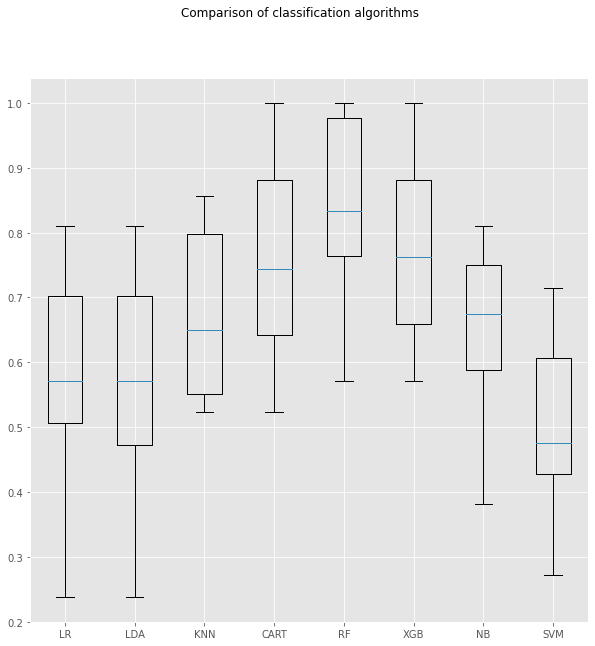

In [35]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'XGB'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

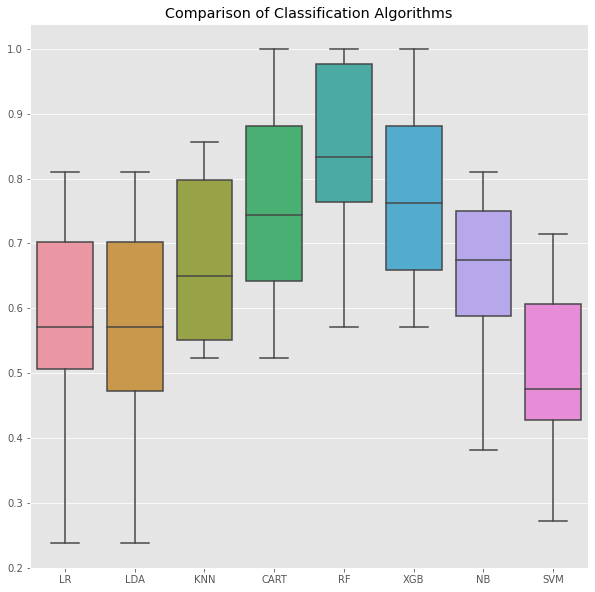

In [36]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=results)
ax.set(title='Comparison of Classification Algorithms')
ax.set_xticklabels(names)


In [59]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)



feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tumor-size,0.233330
deg-malig,0.190337
breast-quad,0.130352
age,0.089168
breast,0.088450
menopause,0.082390
inv-nodes,0.068236
node-caps,0.061537
irradiat,0.056200


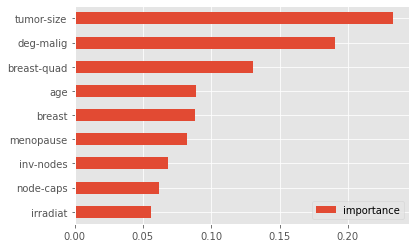

In [66]:
feature_importances.sort_values('importance', ascending=True).plot(kind='barh')

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [100]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [101]:
scores = cross_val_score(rf, X_train_res, y_train_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.88295


In [102]:
probs_rf = rf.predict_proba(X_test_res)[:, 1]
auc_rf = roc_auc_score(y_test_res, probs_rf)

In [103]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red', label=f'AUC (Random Forests) = {auc_rf:.2f}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='baseline')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

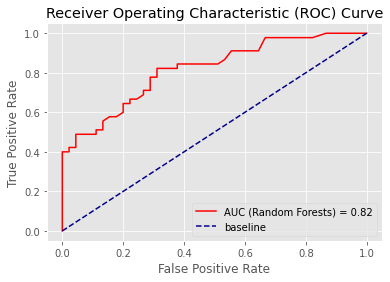

In [104]:
probs = rf.predict_proba(X_test_res)  
probs = probs[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test_res, probs) 
plot_roc_curve(fpr, tpr)

In [72]:
rf.predict(X_test_res)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

In [75]:
ex1 =X_test.iloc[0].tolist()
ex1

[55.5, 1.0, 42.0, 2.0, 0.0, 3.0, 1.0, 1.0, 0.0]

In [76]:
sample1 = np.array(ex1).reshape(1, -1)
sample1

array([[55.5,  1. , 42. ,  2. ,  0. ,  3. ,  1. ,  1. ,  0. ]])

In [94]:
rf.predict(sample1)

array([0])

In [95]:
ex2 =X_test.iloc[8].tolist()
sample2 = np.array(ex2).reshape(1, -1)
rf.predict(sample2)

array([1])

In [92]:
pd.DataFrame(sample1, columns=X.columns)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,55.5,1.0,42.0,2.0,0.0,3.0,1.0,1.0,0.0


In [82]:
pip install shap

     |████████████████████████████████| 358kB 8.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=894d4bf2ab641b75fc0bbaf0e0515533037a6aea44418837cbdf329203927790
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [89]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

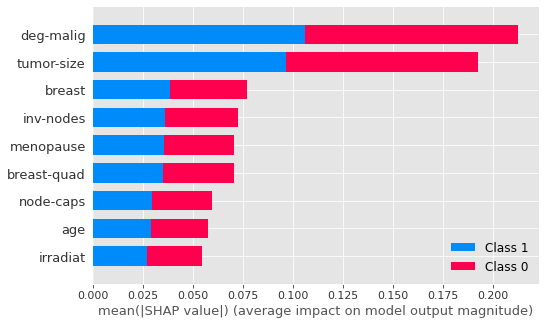

In [91]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

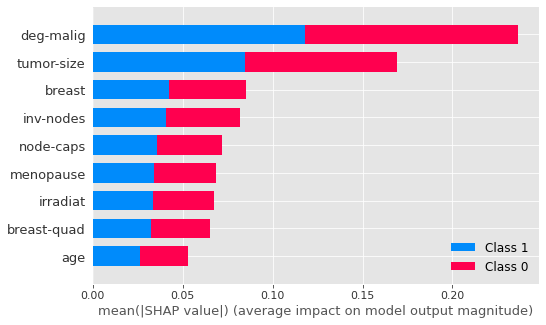

In [88]:
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

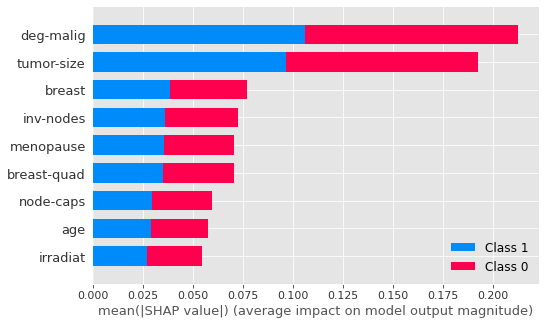

In [105]:
shap.summary_plot(shap_values, X_test)